In [131]:
import scipy.io
import numpy as np
import pandas as pd
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### SVM
We use RBF kernel (Gaussian kernel) for the Support Vector Machine.

In [132]:
targets = scipy.io.loadmat('tar.mat')['target_parameter'].T
noises = scipy.io.loadmat('jam.mat')['jam_parameter'].T

In [133]:
print(targets.shape, noises.shape)

(1000, 3) (1000, 3)


In [134]:
targets_label = np.ones((targets.shape[0]), dtype=np.int8)
noises_label = np.zeros((noises.shape[0]), dtype=np.int8)

In [135]:
data = np.concatenate((targets, noises), axis=0)
labels = np.concatenate((targets_label, noises_label), axis=0)

In [136]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=7)

In [137]:
clf = svm.SVC()
clf.fit(data_train, labels_train)

SVC()

In [138]:
predicted_test = clf.predict(data_test)

In [139]:
types = ['noise', 'target']

In [140]:
print(classification_report(labels_test, predicted_test, target_names=types, digits=4))

              precision    recall  f1-score   support

       noise     0.9900    0.9802    0.9851       202
      target     0.9800    0.9899    0.9849       198

    accuracy                         0.9850       400
   macro avg     0.9850    0.9850    0.9850       400
weighted avg     0.9850    0.9850    0.9850       400



#### Find the Optimal Paramters for SVM

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
parameters = {'C': np.arange(1, 11 ,1), 
              'gamma': [0.001, 0.01, 1]}

In [143]:
# find hyper parameters using grid search
model = svm.SVC()
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(data_train, labels_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'gamma': [0.001, 0.01, 1]})
0.9893750000000001
SVC(C=6, gamma=1)


In [144]:
clf = svm.SVC(C=7, kernel='rbf', gamma=1)
clf.fit(data_train, labels_train)
pred_svm = clf.predict(data_test)

In [145]:
print(classification_report(labels_test, pred_svm, target_names=types, digits=4))

              precision    recall  f1-score   support

       noise     0.9950    0.9901    0.9926       202
      target     0.9899    0.9949    0.9924       198

    accuracy                         0.9925       400
   macro avg     0.9925    0.9925    0.9925       400
weighted avg     0.9925    0.9925    0.9925       400



### KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
parameters = {'n_neighbors': [1, 3, 5, 7, 9]}

In [148]:
# find hyper parameters using grid search
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(data_train, labels_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})
0.99
KNeighborsClassifier(n_neighbors=9)


In [149]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(data_train, labels_train)
pred_knn = clf.predict(data_test)
print(classification_report(labels_test, pred_knn, target_names=types, digits=4))

              precision    recall  f1-score   support

       noise     0.9901    0.9950    0.9926       202
      target     0.9949    0.9899    0.9924       198

    accuracy                         0.9925       400
   macro avg     0.9925    0.9925    0.9925       400
weighted avg     0.9925    0.9925    0.9925       400



### Visualization

##### Ground Truth

In [150]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [151]:
X = data_test[np.logical_or(labels_test==0,labels_test==1)]
Y = labels_test

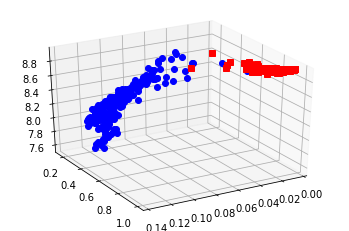

In [152]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
# ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

##### Results using SVM

In [153]:
Y = pred_svm
X = data_test[np.logical_or(Y==0,Y==1)]

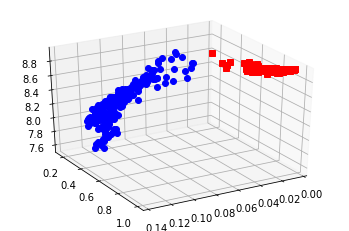

In [154]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
# ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

##### Results using KNN

In [155]:
Y = pred_knn
X = data_test[np.logical_or(Y==0,Y==1)]

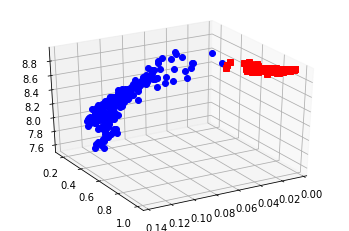

In [156]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
# ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()